In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import tensorflow as tf

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        if file_path == "/kaggle/input/thermal-images-diseased-healthy-leaves-paddy/thermal images UL/Read Me - Oryza sativa - TImages.docx":
            continue
        #print(file_path.split('/')[5], file_path.split('/')[6])
        #categories.add(file_path.split('/')[5])
        #print(os.path.join(dirname, filename).split('/')[5])


In [2]:
import cv2

cv_img = cv2.imread('/kaggle/input/thermal-images-diseased-healthy-leaves-paddy/thermal images UL/leaf spot/thermalimage11c.jpg')
cv_img.shape

(240, 320, 3)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/thermal-images-diseased-healthy-leaves-paddy'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        #print(file_path)
        if file_path == "/kaggle/input/thermal-images-diseased-healthy-leaves-paddy/thermal images UL/Read Me - Oryza sativa - TImages.docx":
            continue
        img = cv2.imread(file_path)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img[218:, :58] = 0
        #img[:30,275:] = 0
        #img[210:,275:] = 0
        #img[:,300:] = 0
        if not os.path.isdir(file_path.split('/')[-2]):
            os.mkdir(file_path.split('/')[-2])
        cv2.imwrite("/".join(file_path.split('/')[-2:]), img)

In [4]:
!pwd
!ls

/kaggle/working
 BLB   Blast   healthy	 hispa	'leaf folder'  'leaf spot'


In [5]:
ds_train = tf.keras.utils.image_dataset_from_directory(".", seed=42, label_mode='categorical',
                                                       color_mode='rgb', batch_size=32, image_size=(224,224),
                                                       validation_split=0.2, subset="training")
ds_test = tf.keras.utils.image_dataset_from_directory(".", seed=42, label_mode='categorical',
                                                      color_mode='rgb', batch_size=32, image_size=(224,224),
                                                      validation_split=0.2, subset="validation")

Found 636 files belonging to 6 classes.
Using 509 files for training.



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Found 636 files belonging to 6 classes.
Using 127 files for validation.


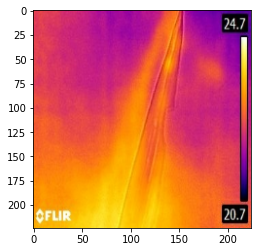

In [6]:
pyplot.imshow(list(ds_train.as_numpy_iterator())[0][0][0]/ 255)

In [7]:
len(ds_train), len(ds_test)

(16, 4)

In [8]:
base_model = tf.keras.applications.resnet50.ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                                     input_shape=(224, 224, 3), pooling='max', include_top = False)

In [9]:
inputs = tf.keras.Input(shape=(224, 224, 3,))
x = base_model(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=200, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(units=6, activation="softmax")(x)

model = tf.keras.Model(inputs=[inputs], outputs=[output])

In [10]:
model.layers

In [11]:
model.layers[1].trainable = False

In [12]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["acc"])

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1206      
Total params: 23,998,718
Trainable params: 411,006
Non-trainable params: 23,587,712
___________________________________________

In [14]:
model.fit(ds_train, validation_data=ds_test, epochs = 15)

Epoch 1/15
16/16 [==============================] - 49s 3s/step - loss: 8.8292 - acc: 0.2829 - val_loss: 1.6901 - val_acc: 0.4567
Epoch 2/15
16/16 [==============================] - 45s 3s/step - loss: 1.8025 - acc: 0.4381 - val_loss: 1.3111 - val_acc: 0.5669
Epoch 3/15
16/16 [==============================] - 44s 3s/step - loss: 1.3061 - acc: 0.4912 - val_loss: 0.8984 - val_acc: 0.7638
Epoch 4/15
16/16 [==============================] - 44s 3s/step - loss: 1.1173 - acc: 0.5756 - val_loss: 0.7956 - val_acc: 0.7559
Epoch 5/15
16/16 [==============================] - 45s 3s/step - loss: 1.0227 - acc: 0.6090 - val_loss: 0.6871 - val_acc: 0.8268
Epoch 6/15
16/16 [==============================] - 44s 3s/step - loss: 0.8689 - acc: 0.6621 - val_loss: 0.5567 - val_acc: 0.8583
Epoch 7/15
16/16 [==============================] - 45s 3s/step - loss: 0.8014 - acc: 0.6896 - val_loss: 0.5449 - val_acc: 0.8661
Epoch 8/15
16/16 [==============================] - 44s 3s/step - loss: 0.7377 - acc: 0.71

In [15]:
model.evaluate(ds_test)

4/4 [==============================] - 9s 2s/step - loss: 0.3527 - acc: 0.8583


[0.3526935875415802, 0.8582677245140076]

In [16]:
model.layers[1].trainable = True

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss="categorical_crossentropy", metrics=["acc"])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1206      
Total params: 23,998,718
Trainable params: 23,945,598
Non-trainable params: 53,120
____________________________________________

In [19]:
model.fit(ds_train, validation_data=ds_test, epochs = 20)

Epoch 1/20
16/16 [==============================] - 143s 8s/step - loss: 3.9846 - acc: 0.3202 - val_loss: 0.3318 - val_acc: 0.8976
Epoch 2/20
16/16 [==============================] - 133s 8s/step - loss: 1.7416 - acc: 0.4695 - val_loss: 0.4021 - val_acc: 0.8425
Epoch 3/20
16/16 [==============================] - 133s 8s/step - loss: 1.2065 - acc: 0.5442 - val_loss: 0.4170 - val_acc: 0.8110
Epoch 4/20
16/16 [==============================] - 134s 8s/step - loss: 0.9140 - acc: 0.6385 - val_loss: 0.4370 - val_acc: 0.8189
Epoch 5/20
16/16 [==============================] - 134s 8s/step - loss: 0.8232 - acc: 0.6503 - val_loss: 0.4543 - val_acc: 0.8504
Epoch 6/20
16/16 [==============================] - 133s 8s/step - loss: 0.6671 - acc: 0.7387 - val_loss: 0.4803 - val_acc: 0.8425
Epoch 7/20
16/16 [==============================] - 133s 8s/step - loss: 0.5878 - acc: 0.7741 - val_loss: 0.5089 - val_acc: 0.8189
Epoch 8/20
16/16 [==============================] - 133s 8s/step - loss: 0.5738 - a

In [20]:
model.evaluate(ds_test, batch_size=32)

4/4 [==============================] - 9s 2s/step - loss: 0.4013 - acc: 0.8740


[0.4012845754623413, 0.874015748500824]

In [21]:
model.save('./model')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
